In [1]:
import sys
sys.path.append("../../src")

In [2]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gdown
import pandas as pd

# URLs for the datasets
urls = [
    "https://drive.google.com/uc?id=14X7usabTceBqo5d1-pcR9m5bbjoUPIzR",
    "https://drive.google.com/uc?id=1MsX7XJAAj-3whCKV9ZNAwO_h3hGwpx3q",
    "https://drive.google.com/uc?id=1Sxtwiy9PdGq_xxxVAPAWu7M_XqCKh0Lr",
    "https://drive.google.com/uc?id=1Zu_bRhPg0CnHW-ihAHurzWTk7uJ11uRC",
    "https://drive.google.com/uc?id=1kSciVM9LLaLsJXiY1vaAO-UtBzZ-YE6l"
]

dfs = []  # list to hold the dataframes

# Download and read each dataset into a dataframe
for url in urls:
    gdown.download(url, 'temp.csv', quiet=False)
    df = pd.read_csv('temp.csv')
    dfs.append(df)

# Assign each dataframe to a variable
df1, df2, df3, df4, df5 = dfs

# View the first few rows of each dataframe to understand their structure
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())
print(df5.head())

Downloading...
From: https://drive.google.com/uc?id=14X7usabTceBqo5d1-pcR9m5bbjoUPIzR
To: /home/jovyan/workspace/ml_prediction_forecasting/notebooks/predictive/temp.csv
100%|██████████| 46.2k/46.2k [00:00<00:00, 51.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MsX7XJAAj-3whCKV9ZNAwO_h3hGwpx3q
To: /home/jovyan/workspace/ml_prediction_forecasting/notebooks/predictive/temp.csv
100%|██████████| 5.50k/5.50k [00:00<00:00, 8.46MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1Sxtwiy9PdGq_xxxVAPAWu7M_XqCKh0Lr
From (redirected): https://drive.google.com/uc?id=1Sxtwiy9PdGq_xxxVAPAWu7M_XqCKh0Lr&confirm=t&uuid=19fc64ee-b55a-4bc5-9e0b-16605856baca
To: /home/jovyan/workspace/ml_prediction_forecasting/notebooks/predictive/temp.csv
100%|██████████| 203M/203M [00:01<00:00, 122MB/s]  
Downloading...
From: https://drive.google.com/uc?id=1Zu_bRhPg0CnHW-ihAHurzWTk7uJ11uRC
To: /home/jovyan/workspace/ml_prediction_forecasting/notebooks/predictive/temp.csv
100%|██████████| 24

         date  wm_yr_wk    d
0  2011-01-29     11101  d_1
1  2011-01-30     11101  d_2
2  2011-01-31     11101  d_3
3  2011-02-01     11101  d_4
4  2011-02-02     11101  d_5
         date     event_name event_type
0  2011-02-06      SuperBowl   Sporting
1  2011-02-14  ValentinesDay   Cultural
2  2011-02-21  PresidentsDay   National
3  2011-03-09      LentStart  Religious
4  2011-03-16      LentWeek2  Religious
  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26
   d_1542  d_1543  d_1544  d_1545  d_1546  d_1547  d_1548  d_1549  d_1550  \
0       0       1       0       2       1       0       2       0       1   
1       0       0       0       0       0       0       0       0       1   
2       0       0       0       0       0       1       0       0  

From the output above, it appears that we have the following data structures:

- Calendar Data (df1): Contains the date, the corresponding week identifier, and a day identifier.
- Events Data (df2): Contains the date, event name, and event type.
- Item Price Data (df3): Contains the store ID, item ID, week identifier, and sell price.
- Evaluation Data (df4): Appears to contain sales data for multiple days, but the structure isn't clear just from the first few rows. Each column d_xxx seems to represent the sales for a specific day.
- Training Data (df5): Contains an ID, item ID, department ID, category ID, store ID, state ID, and sales data for multiple days.

Observations & Proposed Changes:

- The Calendar Data looks fine.
- The Events Data seems appropriate as well.
- Item Price Data is in good shape, containing the required details.

- Evaluation Data (df4):
  - This seems to be in wide format with sales data for each day represented as a separate column. It might be helpful to melt this dataframe to a long format for easier analysis and modeling.


- Training Data (df5):
  - This dataframe is also in a wide format. It might be beneficial to melt this into a long format similar to the evaluation data.

To transform the wide dataframe into a long format, we'll use the melt function from pandas

In [3]:
# Melt the training data
df5_melted = pd.melt(df5, 
                     id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                     var_name='d', 
                     value_name='sales')

# Display the first few rows of the transformed dataframe
print(df5_melted.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales  
0       CA  d_1      0  
1       CA  d_1      0  
2       CA  d_1      0  
3       CA  d_1      0  
4       CA  d_1      0  


To verify the transformation and ensure correctness, we will perform the following checks:

- Dimensionality Check: Ensure that the total number of rows in the melted dataframes matches the expected count based on the original dataframes.
    - For df5, the number of rows in the melted version should be: "number of unique items × number of days in the dataset"

- Value Check: Sample a few item-day combinations and compare the sales values in the melted dataframe with the corresponding values in the wide dataframe. This ensures that the melt operation hasn't inadvertently changed any values.

- Missing Values: Ensure that there are no missing values in the sales column of the melted dataframes.

In [4]:
# Dimensionality Check
assert len(df5_melted) == len(df5) * len(df5.columns[6:]), "Mismatch in the number of rows for df5_melted"

# Value Check for df5
# Sample a random item-day combination
sample_item = df5_melted['item_id'].sample().iloc[0]
sample_day = df5_melted['d'].sample().iloc[0]
assert df5_melted[(df5_melted['item_id'] == sample_item) & (df5_melted['d'] == sample_day)]['sales'].iloc[0] == df5[df5['item_id'] == sample_item][sample_day].iloc[0], "Mismatch in sales value for df5_melted"

# Missing Values Check
assert df5_melted['sales'].isna().sum() == 0, "Missing values detected in df5_melted['sales']"

print("All checks passed!")

All checks passed!


In [6]:
# Exporting Weekly Sell Price data to .parquet for future use

df3.to_parquet("weekly_sell_price.parquet", index=False)
print(f"Data exported!")

Data exported!


### Joining Dataframes:
- First, we'll join the training data (df5_melted) with the calendar data (df1) on the 'd' column. This will give us date-related information for each sales entry. Then, we'll join this resulting dataframe with the item price data (df3) on 'item_id', 'store_id', and 'wm_yr_wk' to incorporate the selling price for each item on each day.

In [5]:
# Filter df1 to only include rows up to d_1541
df1_filtered = df1[df1['d'].isin(df5_melted['d'])]

# Merge the dataframes
merged_data = pd.merge(df5_melted, df1_filtered, on='d', how='left')

# Display the first few rows of the merged dataframe
print(merged_data.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  
0       CA  d_1      0  2011-01-29     11101  
1       CA  d_1      0  2011-01-29     11101  
2       CA  d_1      0  2011-01-29     11101  
3       CA  d_1      0  2011-01-29     11101  
4       CA  d_1      0  2011-01-29     11101  


In [6]:
merged_train = pd.merge(merged_data, df3, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')
print(merged_train.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  sell_price  
0       CA  d_1      0  2011-01-29     11101         NaN  
1       CA  d_1      0  2011-01-29     11101         NaN  
2       CA  d_1      0  2011-01-29     11101         NaN  
3       CA  d_1      0  2011-01-29     11101         NaN  
4       CA  d_1      0  2011-01-29     11101         NaN  


In [7]:
# Merge train set with Events dataframe
merged_train = pd.merge(merged_train, df2, on='date', how='left')

# Data Investigation

### Check for any data quality issues

In [8]:
# Sample missing data
sample_missing = merged_train[merged_train['sell_price'].isna()].sample()
sample_item = sample_missing['item_id'].iloc[0]
sample_store = sample_missing['store_id'].iloc[0]
sample_week = sample_missing['wm_yr_wk'].iloc[0]

# Check in original price data
price_check = df3[(df3['item_id'] == sample_item) & (df3['store_id'] == sample_store) & (df3['wm_yr_wk'] == sample_week)]
print(price_check)

Empty DataFrame
Columns: [store_id, item_id, wm_yr_wk, sell_price]
Index: []


In [9]:
missing_weeks_item = merged_train[(merged_train['item_id'] == 'HOUSEHOLD_1_159') & (merged_train['sell_price'].isna())]['wm_yr_wk'].unique()
print(f"Weeks with missing prices for HOUSEHOLD_1_159: \n{sorted(missing_weeks_item)}")

Weeks with missing prices for HOUSEHOLD_1_159: 
[11101, 11102, 11103, 11104, 11105, 11106, 11107, 11108, 11109, 11110, 11111, 11112, 11113, 11114, 11115, 11116, 11117, 11118, 11119, 11120, 11121, 11122, 11123, 11124, 11125, 11126, 11127, 11128, 11129, 11130, 11131, 11132, 11133, 11134, 11135, 11136, 11137, 11138, 11139, 11140, 11141, 11142, 11143, 11144, 11145, 11146, 11147, 11148, 11149, 11150, 11151, 11152, 11201, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11240, 11241, 11242, 11243, 11244, 11245, 11246, 11247, 11248, 11249, 11250, 11251, 11252, 11301, 11302, 11303, 11304, 11305, 11306, 11307, 11308, 11309, 11310, 11311, 11312, 11313, 11314, 11315, 11316, 11317, 11318, 11319, 11320, 11321, 11322, 11323, 11324, 11325, 11326, 11327, 11328, 11329, 11330, 11331, 11332,

In [11]:
# Unique combinations in the merged dataframe
merged_combinations = set(merged_train[['item_id', 'store_id', 'wm_yr_wk']].itertuples(index=False))

# Unique combinations in the price dataframe
price_combinations = set(df3[['item_id', 'store_id', 'wm_yr_wk']].itertuples(index=False))

# Find combinations in the merged dataframe that are not in the price dataframe
missing_combinations = merged_combinations - price_combinations

print(f"Number of combinations in merged data not present in price data: {len(missing_combinations)}")


Number of combinations in merged data not present in price data: 1752423


In [12]:
sample_missing_combinations = list(missing_combinations)[:5]
print("Sample missing combinations:\n", sample_missing_combinations)

Sample missing combinations:
 [Pandas(item_id='FOODS_3_531', store_id='WI_2', wm_yr_wk=11109), Pandas(item_id='FOODS_1_082', store_id='TX_1', wm_yr_wk=11222), Pandas(item_id='FOODS_1_169', store_id='TX_3', wm_yr_wk=11208), Pandas(item_id='FOODS_2_111', store_id='CA_4', wm_yr_wk=11138), Pandas(item_id='HOUSEHOLD_1_405', store_id='CA_1', wm_yr_wk=11326)]


In [13]:
print("Data types in merged_train:\n", merged_train[['item_id', 'store_id', 'wm_yr_wk']].dtypes)
print("\nData types in df3:\n", df3[['item_id', 'store_id', 'wm_yr_wk']].dtypes)

Data types in merged_train:
 item_id     object
store_id    object
wm_yr_wk     int64
dtype: object

Data types in df3:
 item_id     object
store_id    object
wm_yr_wk     int64
dtype: object


In [14]:
duplicates = df3[df3.duplicated(subset=['store_id', 'item_id', 'wm_yr_wk'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [store_id, item_id, wm_yr_wk, sell_price]
Index: []


In [32]:
print(df3.head(2500))

     store_id        item_id  wm_yr_wk  sell_price
0        CA_1  HOBBIES_1_001     11325        9.58
1        CA_1  HOBBIES_1_001     11326        9.58
2        CA_1  HOBBIES_1_001     11327        8.26
3        CA_1  HOBBIES_1_001     11328        8.26
4        CA_1  HOBBIES_1_001     11329        8.26
...       ...            ...       ...         ...
2495     CA_1  HOBBIES_1_011     11445        3.48
2496     CA_1  HOBBIES_1_011     11446        3.48
2497     CA_1  HOBBIES_1_011     11447        3.48
2498     CA_1  HOBBIES_1_011     11448        3.48
2499     CA_1  HOBBIES_1_011     11449        3.48

[2500 rows x 4 columns]


In [16]:
sample_check = df3[df3[['store_id', 'item_id', 'wm_yr_wk']].apply(tuple, axis=1).isin(sample_missing_combinations)]
print(sample_check)

Empty DataFrame
Columns: [store_id, item_id, wm_yr_wk, sell_price]
Index: []


In [15]:
missing_weeks_in_df3 = set(merged_data['wm_yr_wk'].unique()) - set(df3['wm_yr_wk'].unique())
print("Weeks in merged_data not in df3:", missing_weeks_in_df3)

missing_weeks_in_merged_data = set(df3['wm_yr_wk'].unique()) - set(merged_data['wm_yr_wk'].unique())
print("Weeks in df3 not in merged_data:", missing_weeks_in_merged_data)

Weeks in merged_data not in df3: set()
Weeks in df3 not in merged_data: {11520, 11521, 11522, 11523, 11524, 11525, 11526, 11527, 11528, 11529, 11530, 11531, 11532, 11533, 11534, 11535, 11536, 11537, 11538, 11539, 11540, 11541, 11542, 11543, 11544, 11545, 11546, 11547, 11548, 11549, 11550, 11551, 11552, 11601, 11602, 11603, 11604, 11605, 11606, 11607, 11608, 11609, 11610, 11611, 11612, 11613, 11614, 11615, 11616, 11617, 11618, 11619, 11620, 11621, 11513, 11514, 11515, 11516, 11517, 11518, 11519}


In [16]:
# Get unique combinations in both dataframes
merged_data_combinations = set(merged_data[['store_id', 'item_id', 'wm_yr_wk']].itertuples(index=False))
df3_combinations = set(df3[['store_id', 'item_id', 'wm_yr_wk']].itertuples(index=False))

# Find combinations in merged_data that aren't in df3
missing_combinations = merged_data_combinations - df3_combinations

print("Number of combinations in merged_data not present in df3:", len(missing_combinations))
print("Sample missing combinations:", list(missing_combinations)[:5])


Number of combinations in merged_data not present in df3: 1752423
Sample missing combinations: [Pandas(store_id='TX_3', item_id='FOODS_2_338', wm_yr_wk=11212), Pandas(store_id='CA_2', item_id='HOUSEHOLD_1_378', wm_yr_wk=11329), Pandas(store_id='TX_3', item_id='FOODS_2_023', wm_yr_wk=11353), Pandas(store_id='CA_1', item_id='FOODS_1_068', wm_yr_wk=11128), Pandas(store_id='CA_2', item_id='HOUSEHOLD_2_344', wm_yr_wk=11209)]


#### Check the Percentage of Missing Values:
- Let's see how widespread the missing values are in the sell_price column.

In [17]:
missing_percentage = (merged_train['sell_price'].isna().sum() / len(merged_train)) * 100
print(f"Percentage of missing values in sell_price: {missing_percentage:.2f}%")

Percentage of missing values in sell_price: 26.09%


In [18]:
missing_values_df3 = df3.isnull().sum()
print(missing_values_df3)

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64


In [19]:
items_missing_prices = df3[df3['sell_price'].isnull()]['item_id'].value_counts()
print(items_missing_prices.head())

Series([], Name: item_id, dtype: int64)


In [20]:
stores_missing_prices = df3[df3['sell_price'].isnull()]['store_id'].value_counts()
print(stores_missing_prices.head())

Series([], Name: store_id, dtype: int64)


In [21]:
weeks_missing_prices = df3[df3['sell_price'].isnull()]['wm_yr_wk'].value_counts()
print(weeks_missing_prices.head())

Series([], Name: wm_yr_wk, dtype: int64)


In [22]:
unique_d_sales = merged_train['d'].nunique()
unique_d_calendar = df1['d'].nunique()

In [23]:
merged_rows = merged_train.shape[0]
unique_d_merged = merged_train['d'].nunique()

In [24]:
# Extract weeks with missing prices from the merged data
missing_weeks = merged_train[merged_train['sell_price'].isnull()]['wm_yr_wk'].value_counts()

# Display weeks with the most missing data
print("Weeks with the most missing price data:")
print(missing_weeks.head(10))

Weeks with the most missing price data:
11101    136906
11102    129605
11113    127096
11103    125797
11104    123837
11105    122199
11106    120092
11107    118223
11108    116802
11109    115759
Name: wm_yr_wk, dtype: int64


In [25]:
# Extract items with missing prices from the merged data
missing_items = merged_train[merged_train['sell_price'].isnull()]['item_id'].value_counts()

# Display items with the most missing data
print("Items with the most missing price data:")
print(missing_items.head(10))

Items with the most missing price data:
HOUSEHOLD_1_159    15337
HOUSEHOLD_1_242    15228
HOUSEHOLD_1_308    15190
HOUSEHOLD_2_186    15049
FOODS_3_353        15021
HOUSEHOLD_1_489    14929
HOUSEHOLD_1_484    14922
HOUSEHOLD_1_534    14922
FOODS_3_255        14894
HOUSEHOLD_1_526    14852
Name: item_id, dtype: int64


In [26]:
# Extract stores with missing prices from the merged data
missing_stores = merged_train[merged_train['sell_price'].isnull()]['store_id'].value_counts()

# Display stores with the most missing data
print("Stores with the most missing price data:")
print(missing_stores.head(10))

Stores with the most missing price data:
CA_2    1544070
WI_1    1358539
WI_2    1272203
CA_4    1264051
TX_3    1180844
CA_3    1161252
WI_3    1147725
CA_1    1130422
TX_1    1121384
TX_2    1111386
Name: store_id, dtype: int64


In [27]:
# Filtering data for the item 'HOUSEHOLD_1_159' in store 'CA_2' which has missing prices
filtered_data = merged_train[(merged_train['item_id'] == 'HOUSEHOLD_1_159') & 
                            (merged_train['store_id'] == 'CA_2') & 
                            (merged_train['sell_price'].isnull())]

# Extract weeks with missing prices for this combination
missing_weeks_for_combination = filtered_data['wm_yr_wk'].unique()

print(f"Number of missing weeks for item 'HOUSEHOLD_1_159' in store 'CA_2': {len(missing_weeks_for_combination)}")
print(f"Weeks with missing prices for HOUSEHOLD_1_159 in CA_2: \n{sorted(missing_weeks_for_combination)}")


Number of missing weeks for item 'HOUSEHOLD_1_159' in store 'CA_2': 219
Weeks with missing prices for HOUSEHOLD_1_159 in CA_2: 
[11101, 11102, 11103, 11104, 11105, 11106, 11107, 11108, 11109, 11110, 11111, 11112, 11113, 11114, 11115, 11116, 11117, 11118, 11119, 11120, 11121, 11122, 11123, 11124, 11125, 11126, 11127, 11128, 11129, 11130, 11131, 11132, 11133, 11134, 11135, 11136, 11137, 11138, 11139, 11140, 11141, 11142, 11143, 11144, 11145, 11146, 11147, 11148, 11149, 11150, 11151, 11152, 11201, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11240, 11241, 11242, 11243, 11244, 11245, 11246, 11247, 11248, 11249, 11250, 11251, 11252, 11301, 11302, 11303, 11304, 11305, 11306, 11307, 11308, 11309, 11310, 11311, 11312, 11313, 11314, 11315, 11316, 11317, 11318, 11319, 11320, 113

#### Investigate the Missing Values:
- If the percentage of missing values is significant, we should investigate further. For example, check if specific items or stores have more missing prices than others.

In [28]:
subset_data = merged_train[(merged_train['item_id'] == 'HOUSEHOLD_1_159') & (merged_train['store_id'] == 'CA_2')]
missing_percentage = (subset_data['sell_price'].isnull().sum() / len(subset_data)) * 100
print(f"Percentage of missing sell prices for 'HOUSEHOLD_1_159' in 'CA_2': {missing_percentage:.2f}%")

Percentage of missing sell prices for 'HOUSEHOLD_1_159' in 'CA_2': 99.48%


In [29]:
# Group by item_id and store_id
grouped = merged_train.groupby(['item_id', 'store_id'])

# Calculate the percentage of missing sell_price for each group
missing_percentage = grouped['sell_price'].apply(lambda x: x.isnull().mean() * 100)

# Filter out the combinations where the missing percentage is greater than 90%
high_missing_combinations = missing_percentage[missing_percentage > 90].reset_index()

print(high_missing_combinations)


              item_id store_id  sell_price
0         FOODS_1_029     CA_4   97.669903
1         FOODS_1_122     CA_1   90.873786
2         FOODS_1_122     CA_2   90.873786
3         FOODS_1_122     CA_3   90.873786
4         FOODS_1_122     CA_4   90.873786
...               ...      ...         ...
1126  HOUSEHOLD_2_418     WI_2   92.686084
1127  HOUSEHOLD_2_418     WI_3   93.139159
1128  HOUSEHOLD_2_434     TX_3   92.686084
1129  HOUSEHOLD_2_498     CA_4   92.686084
1130  HOUSEHOLD_2_498     WI_3   93.592233

[1131 rows x 3 columns]


In [30]:
# Calculate the total number of unique item-store combinations in the merged_data
total_item_store_combinations = merged_train[['item_id', 'store_id']].drop_duplicates().shape[0]

# Calculate the percentage of problematic item-store combinations
percentage_problematic = (1131 / total_item_store_combinations) * 100

print(percentage_problematic)


3.709412922269597


# Data Cleaning

- Drop: If the missing data is random and constitutes a small portion of the dataset.
- Impute: If the missing data follows a pattern or is a significant portion of the dataset.

Action Plan:

- Calculate the percentage of missing values for each feature.
- Based on the percentage, decide whether to drop or impute.

Let's first inspect the percentage of missing values in our dataset.

In [8]:
# Calculate the percentage of missing values for each column
missing_percentage = merged_train.isnull().mean() * 100

# Display columns with missing values (if any)
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

event_name    91.585761
event_type    91.585761
sell_price    26.093496
dtype: float64

The sell_price is a crucial feature for predicting sales revenue. Dropping a quarter of our dataset might lead to a significant loss of information, which is undesirable. Instead, we should look to impute these missing values.

There are various strategies to impute missing values:

- Mean/Median Imputation: Replace missing values with the mean or median of the column. This approach is suitable for features that have a normal distribution or when the missing data is completely random.
- Mode Imputation: Replace missing values with the most frequent value. This is more applicable for categorical data.
- Time Series Imputation: For time series data, one can use methods like forward fill or backward fill.

In [9]:
# Compute the median sell price for each store-item combination
medians = merged_train.groupby(['store_id', 'item_id'])['sell_price'].transform('median')

# Fill missing values in 'sell_price' with the corresponding median values
merged_train['sell_price'].fillna(medians, inplace=True)

# Verify if there are any missing values left
missing_after_impute = merged_train['sell_price'].isnull().sum()
print(f"Number of missing values after imputation: {missing_after_impute}")

Number of missing values after imputation: 659715


We can see a significant reduction from the original number of missing values, but there are still some left. The remaining missing values could be due to items that never had a sale price listed in the given data. For such cases, we have a few options:

- Drop the rows with missing sell prices: This is the simplest method but may result in loss of some data.
- Fill with a global median or mean: Calculate the median or mean of the sell_price column and fill the remaining missing values with it. This might introduce some bias, but it is a quick way to handle missing values.
- Assign a default value: Sometimes, assigning a default value (like 0) might be an option, but in this case, it might not be logical as a sell price of 0 doesn't make sense.

Given the nature of our dataset and the task, we want to use the second option (filling with a global median or mean). This ensures we don't lose any rows of data, and while there might be some bias introduced, it's likely a reasonable estimate for items with no historical sell price data.

In [10]:
# Calculate the global median of the 'sell_price' column
sell_price_median = merged_train['sell_price'].median()

# Fill the remaining missing values with the calculated median
merged_train['sell_price'].fillna(sell_price_median, inplace=True)

# Check again the number of missing values
missing_values_after = merged_train['sell_price'].isnull().sum()

print(f"Number of missing values after imputation: {missing_values_after}")

Number of missing values after imputation: 0


In [11]:
merged_train['event_name'].fillna("NoEvent", inplace=True)
merged_train['event_type'].fillna("NoEvent", inplace=True)

In [37]:
merged_train.tail(500)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price,event_name,event_type
47106550,FOODS_3_325_WI_3_evaluation,FOODS_3_325,FOODS_3,FOODS,WI_3,WI,d_1541,1,2015-04-18,11512,2.50,NoEvent,NoEvent
47106551,FOODS_3_326_WI_3_evaluation,FOODS_3_326,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,1.48,NoEvent,NoEvent
47106552,FOODS_3_327_WI_3_evaluation,FOODS_3_327,FOODS_3,FOODS,WI_3,WI,d_1541,2,2015-04-18,11512,2.98,NoEvent,NoEvent
47106553,FOODS_3_328_WI_3_evaluation,FOODS_3_328,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,3.88,NoEvent,NoEvent
47106554,FOODS_3_329_WI_3_evaluation,FOODS_3_329,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,2.98,NoEvent,NoEvent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47107045,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1541,2,2015-04-18,11512,2.88,NoEvent,NoEvent
47107046,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,2.00,NoEvent,NoEvent
47107047,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,3.98,NoEvent,NoEvent
47107048,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,1.28,NoEvent,NoEvent


# Feature Engineering

In [12]:
train_data = merged_train.copy()

In [13]:
# Calculating Sales Revenue for training purpose
train_data['sales_revenue'] = train_data['sales'] * train_data['sell_price']

In [40]:
train_data.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price,event_name,event_type,sales_revenue
47107045,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1541,2,2015-04-18,11512,2.88,NoEvent,NoEvent,5.76
47107046,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,2.00,NoEvent,NoEvent,0.00
47107047,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,3.98,NoEvent,NoEvent,0.00
47107048,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,1.28,NoEvent,NoEvent,0.00
47107049,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1541,3,2015-04-18,11512,1.00,NoEvent,NoEvent,3.00


In [14]:
from features.build_features import create_lagged_and_rolling_features, create_trend_and_special_day_features

train_data = create_lagged_and_rolling_features(train_data)
train_data = create_trend_and_special_day_features(train_data)

In [42]:
pd.set_option('display.max_columns', None)
train_data.tail(500)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price,event_name,event_type,sales_revenue,sales_lag_7,rolling_mean_7_7,rolling_mean_7_28,sales_lag_28,rolling_mean_28_7,rolling_mean_28_28,sales_trend,is_weekend
47106550,FOODS_3_325_WI_3_evaluation,FOODS_3_325,FOODS_3,FOODS,WI_3,WI,d_1541,1,2015-04-18,11512,2.50,NoEvent,NoEvent,2.50,1.0,0.857143,0.928571,0.0,0.857143,0.250000,1.0,True
47106551,FOODS_3_326_WI_3_evaluation,FOODS_3_326,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,1.48,NoEvent,NoEvent,0.00,0.0,0.000000,0.000000,0.0,0.000000,2.500000,0.0,True
47106552,FOODS_3_327_WI_3_evaluation,FOODS_3_327,FOODS_3,FOODS,WI_3,WI,d_1541,2,2015-04-18,11512,2.98,NoEvent,NoEvent,5.96,1.0,2.000000,3.000000,6.0,4.714286,3.214286,-5.0,True
47106553,FOODS_3_328_WI_3_evaluation,FOODS_3_328,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,3.88,NoEvent,NoEvent,0.00,0.0,0.285714,0.357143,0.0,0.285714,0.250000,0.0,True
47106554,FOODS_3_329_WI_3_evaluation,FOODS_3_329,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,2.98,NoEvent,NoEvent,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47107045,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1541,2,2015-04-18,11512,2.88,NoEvent,NoEvent,5.76,0.0,0.571429,0.714286,2.0,0.857143,0.535714,-2.0,True
47107046,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,2.00,NoEvent,NoEvent,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,True
47107047,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,3.98,NoEvent,NoEvent,0.00,3.0,2.000000,0.964286,1.0,0.142857,0.964286,2.0,True
47107048,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,1.28,NoEvent,NoEvent,0.00,0.0,0.000000,0.035714,0.0,0.142857,0.321429,0.0,True


In [19]:
# Exporting past 90 days data to use it for our deployment usage

from data.export import export_to_parquet
export_to_parquet(train_data)

Data exported to recent_data.parquet


In [15]:
from features.label_encode import label_encode_data

# Columns to label encode
cat_columns = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'event_name', 'event_type']

train_data, encoders_dict = label_encode_data(train_data, cat_columns)

In [17]:
from joblib import dump
dump(encoders_dict, 'encoders_dict.joblib')

['encoders_dict.joblib']

In [16]:
from joblib import dump

# Exporting feature order for future use
feature_order = train_data.columns.tolist()
dump(feature_order, 'feature_order.joblib')

['feature_order.joblib']

# Modeling

In [ ]:
from models.train_model import train_val_split

train_df, val_df = train_val_split(train_data)

In [21]:
import gc

# Delete the unused dataframes
del df1, df2, df3, df4, df5, df5_melted, df1_filtered, merged_data, missing_percentage, train_data

# Force garbage collection
gc.collect()

20

In [21]:
sample_df = train_df.sample(frac=0.5)  # Takes a 50% random sample

In [ ]:
from models.train_model import train_xgb_model

# Features and target variable
features = [col for col in sample_df.columns if col not in ['sales_revenue', 'date', 'sales']]
target = 'sales_revenue'

model = train_xgb_model(sample_df, val_df, features, target)

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	train-rmse:9.23413	eval-rmse:11.10508
[10]	train-rmse:7.73214	eval-rmse:9.47759
[20]	train-rmse:6.95896	eval-rmse:8.61812
[30]	train-rmse:6.47771	eval-rmse:7.84849
[40]	train-rmse:6.25703	eval-rmse:7.46436
[50]	train-rmse:6.11586	eval-rmse:7.18638


In [ ]:
from joblib import dump
model_filename = 'xgb_model_sample.joblib'
dump(model, model_filename)

In [22]:
from importlib import reload
import models.train_model
reload(models.train_model)

<module 'models.train_model' from '/home/jovyan/workspace/ml_prediction_forecasting/notebooks/../src/models/train_model.py'>

## Model Evaluation

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb

# Load the model
from joblib import load
loaded_model = load('xgb_model_sample.joblib')

# Features and target variable
features = [col for col in train_df.columns if col not in ['sales_revenue', 'date', 'sales']]
target = 'sales_revenue'

# # Extract features and target from train and validation datasets
# train_features = train_df[features]
# train_labels = train_df[target]

val_features = val_df[features]
val_labels = val_df[target]

# Convert features to DMatrix format for prediction
# train_data_matrix = xgb.DMatrix(train_features)
val_data_matrix = xgb.DMatrix(val_features)

# Use the loaded model to predict the sales revenue
# train_predictions = loaded_model.predict(train_data_matrix)
val_predictions = loaded_model.predict(val_data_matrix)

# Compute RMSE for train and validation predictions
# train_rmse = np.sqrt(mean_squared_error(train_labels, train_predictions))
val_rmse = np.sqrt(mean_squared_error(val_labels, val_predictions))

# print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Validation RMSE: 6.662357310568102


/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


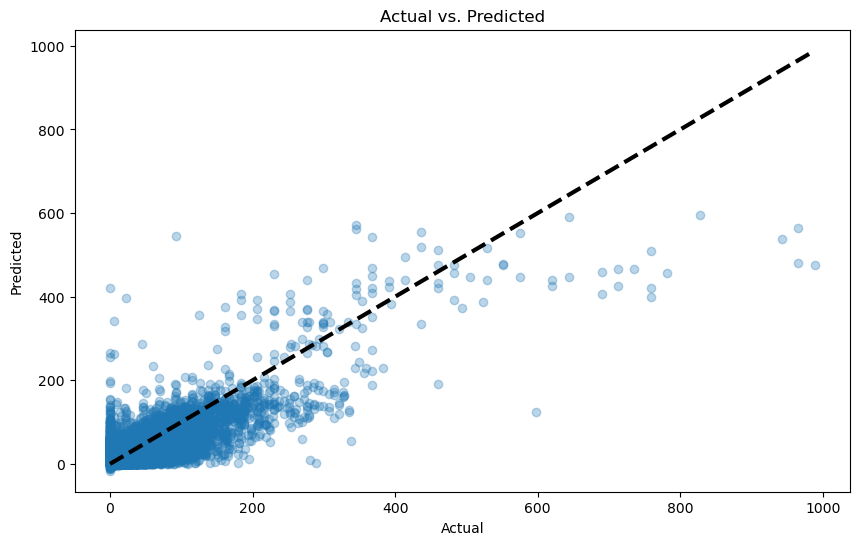

In [23]:
import matplotlib.pyplot as plt

# Predict on validation set
val_predictions = loaded_model.predict(xgb.DMatrix(val_df[features]))

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(val_df[target], val_predictions, alpha=0.3)
plt.plot([val_df[target].min(), val_df[target].max()], [val_df[target].min(), val_df[target].max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

Actual vs. Predicted Plot: This plot will show the predicted values against the actual values. If the model is perfect, all the points should lie along a 45-degree line (y=x line).

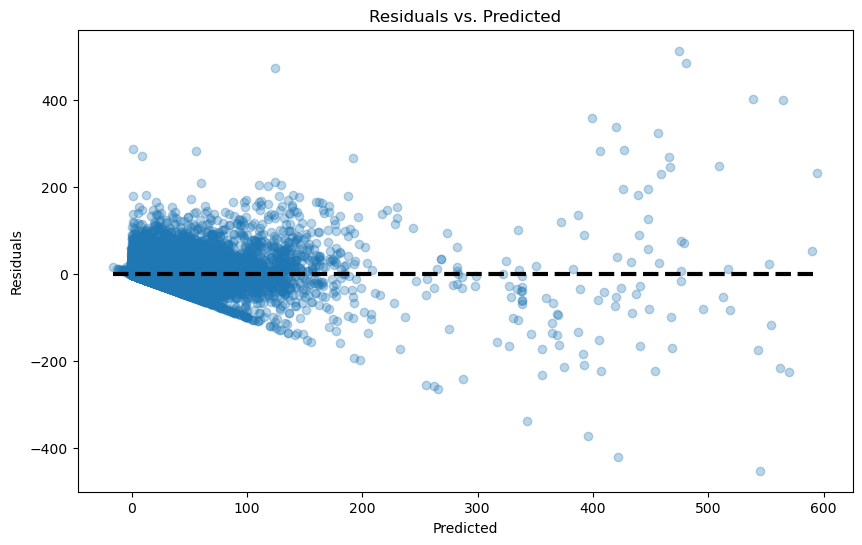

In [24]:
residuals = val_df[target] - val_predictions

plt.figure(figsize=(10, 6))
plt.scatter(val_predictions, residuals, alpha=0.3)
plt.plot([val_predictions.min(), val_predictions.max()], [0, 0], 'k--', lw=3)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

Residuals Plot: Plotting residuals (difference between actual and predicted values) can help identify any patterns that the model might not be capturing.

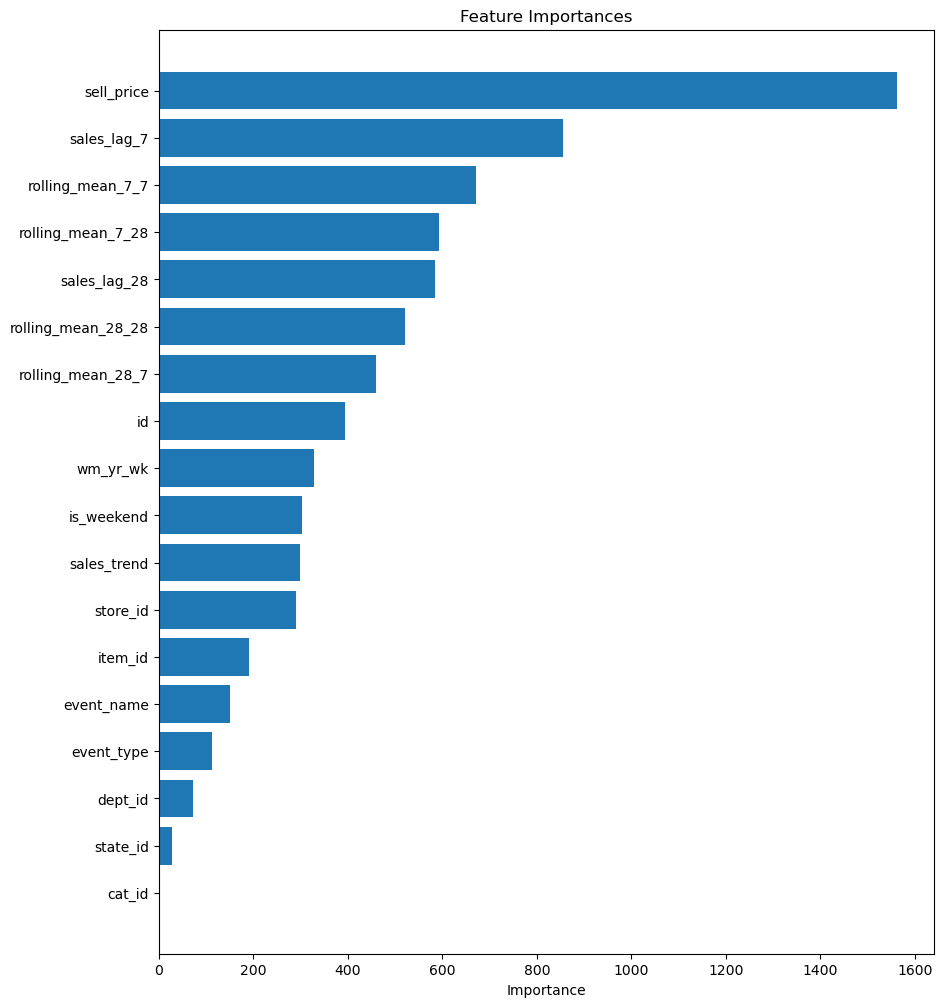

In [25]:
# Extract feature importances
feature_importances = loaded_model.get_score(importance_type='weight')

# Sort features by importance
sorted_idx = sorted(feature_importances, key=feature_importances.get, reverse=True)

plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), [feature_importances[i] for i in sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), sorted_idx)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [44]:
import pandas as pd
print(pd.__version__)

1.4.2
